**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Brian Nguyen
- Nathan Wong
- Daniel Phan
- Ryley Mao

# COGS 108 - Data Checkpoint

# Research Question

Can we build a predictive model to estimate how many points an NBA superstar will score in a given game, based on player performance metrics, game location, opponent defensive stats, and team offensive context? Specifically, we will use variables such as Points per Game (PPG), Field Goal Attempts per Game (FGA), Effective Field Goal Percentage (eFG%), True Shooting Percentage (TS%), home/away status, opponent defensive rating, opponent FG% allowed, opponent PPG allowed, team offensive rating, and team pace.



## Background and Prior Work


All members of our group are passionate NBA fans and active sports bettors, and we wanted to take a data-driven approach to improve that decision-making process. Millions of fans like us attempt to guess whether NBA superstars will score over a certain number of points on platforms like PrizePicks, often relying on intuition, matchup narratives, or raw stat trends. 

While many projects exist that aim to predict general fantasy performance or player stat lines, few focus specifically on individual point prediction for NBA superstars, and even fewer do so with an emphasis on practical, daily usability. For instance, a relevant GitHub project is "nba-player-points-prediction"<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), which used Linear Regression to predict point totals but lacked player-specific model tailoring and did not incorporate matchup context or intangible factors like rest or home/away which are limitations we aim to avoid.

Another similar project, NBAplayer_Performance_Pred<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), used Random Forest and Ridge Regression models to predict NBA player performance stats. While the project incorporated some useful statistical features, it focused more on general performance across all players rather than narrowing in on top scorers or real-world prediction usability. Also it did not include game-specific contextual variables such as rest days or injuries, which we believe are crucial for predicting scoring outputs on a game-to-game basis.

We want to design a tool that predicts a superstar’s point total on a given night by combining recent player performance, opponent defensive metrics, and game context (e.g., back-to-back games, home/away, rest days). Rather than building a generalized model across all players, we will narrow our scope to top scorers (top 50 in Points per game) in the regular season and aim for game-to-game predictive accuracy that could be realistically applied by fans, fantasy players, or bettors looking to gain an edge.	


1. <a name="cite_note-1"></a> [^](#cite_ref-1) https://github.com/Jayplect/nba-player-points-prediction
2. <a name="cite_note-2"></a> [^](#cite_ref-2) https://github.com/RayJiazy/NBAplayer_Performance_Pred


# Hypothesis


We hypothesize that a predictive model using player performance metrics, game location, opponent defensive stats, and team offensive context can accurately estimate how many points an NBA superstar will score in a given game. We expect that variables such as PPG, FGA, eFG%, TS%, home/away status, opponent defensive rating, opponent FG% allowed, opponent PPG allowed, team offensive rating, and team pace will show strong relationships with individual scoring. By capturing these factors, we believe the model will be able to make accurate point predictions within a reasonable margin. We believe this will be the outcome because superstar scoring is influenced by consistent patterns in usage, shooting efficiency, and team context, which are reflected in the metrics we selected.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: NBA Stats (1947-present)
  - Link to the dataset:https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats/data
  - Number of observations: ~40000 
  - Number of variables: 7

This dataset contains NBA player and team statistics from 1947 to the present. For this project, we are focusing on the 2014–2025 seasons and 50 superstar players. Each observation represents a single player's performance in one game. Important variables in this dataset include Effective Field Goal Percentage (eFG%), True Shooting Percentage (TS%), opponent defensive rating, opponent field goal percentage allowed, opponent points per game allowed, team offensive rating, and team pace. These variables help us capture how efficiently players score and how difficult their matchups are.

- Dataset #2
  - Dataset Name: Complete NBA Database and Historical Box Scores
  - Link to the dataset:https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores?select=PlayerStatistics.csv
  - Number of observations: ~40000 
  - Number of variables: 3

This second dataset includes game-by-game player stats for recent NBA seasons and provides the remaining key variables we need: Points Per Game (PPG), Field Goal Attempts (FGA), and game location (home/away). These variables are essential for measuring a player’s scoring output and how it might change depending on where the game is played.

This dataset contains NBA player and team statistics from the 1947 season through the present. For our project, we will focus on the 2014–2025 seasons and only include 50 superstar players. Each observation will represent one player's performance in a single game, leading to about 40,000 observations in total. Important variables include Points per Game (PPG), Field Goal Attempts (FGA), Effective Field Goal Percentage (eFG%), True Shooting Percentage (TS%), game location (home/away), opponent defensive rating, opponent field goal percentage allowed, opponent points per game allowed, team offensive rating, and team pace.

To build a complete dataset with all 10 variables, we will merge these two datasets using common keys such as player name, game date, and team. This will allow us to match each player's performance with the opponent and team context for that specific game. We need to filter our data so we are only looking at games from 2014-2025 and only regular season games. We also will be filtering for only our list of 50 superstars:

Nikola Jokic
Giannis Antetokounmpo
Shai Gilgeous Alexander
Luka Doncic
Victor Wembanyama
Anthony Davis
Cade Cunningham
Lebron James
Jayson Tatum
Karl-Anthony Towns
Domantas Sabonis
Kevin Durant
Trae Young
Zion Williamson 
Anthony Edwards
Damian Lillard
James Harden
Jalen Brunson 
Devin Booker
Tyrese Maxey
Paolo Banchero
Lamelo Ball
Stephen Curry
Joel Embiid
Kyrie Irving
Tyler Herro
De Aaron Fox
Jalen Johnson
Tyrese Haliburton
Franz Wagner
Ja Morant
Ivica Zubac
Alperen Sengun
Donovan Mitchell
Jalen Williams
Nikola Vucevic
Evan Mobley 
Jamal Murray
Scottie Barnes
Zach Lavine 
Brandon IIngram
Bam Adebayo
Jaylen Brown
Kawhi Leonard
Desmond Bane
Pascal Siakam
Darius Garland
RJ Barrett
Austin Reaves
Jaren Jackson Jr


## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode


# Superstar players list
superstars = [
    "Nikola Jokic", "Giannis Antetokounmpo", "Shai Gilgeous Alexander", "Luka Doncic",
    "Victor Wembanyama", "Anthony Davis", "Cade Cunningham", "Lebron James", "Jayson Tatum",
    "Karl-Anthony Towns", "Domantas Sabonis", "Kevin Durant", "Trae Young", "Zion Williamson",
    "Anthony Edwards", "Damian Lillard", "James Harden", "Jalen Brunson", "Devin Booker",
    "Tyrese Maxey", "Paolo Banchero", "Lamelo Ball", "Stephen Curry", "Joel Embiid",
    "Kyrie Irving", "Tyler Herro", "De Aaron Fox", "Jalen Johnson", "Tyrese Haliburton",
    "Franz Wagner", "Ja Morant", "Ivica Zubac", "Alperen Sengun", "Donovan Mitchell",
    "Jalen Williams", "Nikola Vucevic", "Evan Mobley", "Jamal Murray", "Scottie Barnes",
    "Zach Lavine", "Brandon IIngram", "Bam Adebayo", "Jaylen Brown", "Kawhi Leonard",
    "Desmond Bane", "Pascal Siakam", "Darius Garland", "RJ Barrett", "Austin Reaves",
    "Jaren Jackson Jr"
]
superstars = [unidecode(name.lower().strip()) for name in superstars]

## NBA Stats (1947- Present)

In [3]:
# Team summaries
team_summary = pd.read_csv('data/Team Summaries.csv')
team_summary['team'] = team_summary['team'].str.split().str[-1]
team_summary = team_summary[['season','team','o_rtg','d_rtg', 'pace']]
team_summary = team_summary[(team_summary['season'] >= 2014) & (team_summary['season'] <= 2025)]

# Opponent stats
opp_stats = pd.read_csv('data/Opponent Stats Per Game.csv')
opp_stats['team'] = opp_stats['team'].str.split().str[-1]
opp_stats = opp_stats[['season', 'team', 'opp_fg_percent', 'opp_pts_per_game']]
opp_stats = opp_stats[(opp_stats['season'] >= 2014) & (opp_stats['season'] <= 2025)]

# Advanced stats
adv = pd.read_csv('data/Advanced.csv')
adv = adv[['season', 'player', 'ts_percent']]
adv = adv[(adv['season'] >= 2014) & (adv['season'] <= 2025)]
adv['player'] = adv['player'].apply(lambda x: unidecode(x.strip().lower()))
adv = adv[adv['player'].isin(superstars)]
adv = adv.groupby(['season', 'player'], as_index=False).agg({'ts_percent': 'mean'})

# Per game stats
game = pd.read_csv('data/Player Per Game.csv')
game = game[['season', 'player', 'e_fg_percent']]
game = game[(game['season'] >= 2014) & (game['season'] <= 2025)]
game['player'] = game['player'].apply(lambda x: unidecode(x.strip().lower()))
game = game[game['player'].isin(superstars)]
game = game.groupby(['season','player'], as_index=False).agg({'e_fg_percent':'mean'})

## Complete NBA Database and Historical Box Scores

In [4]:
# Player game-by-game
stats = pd.read_csv('data/PlayerStatistics.csv')
stats['player'] = stats['firstName'] + ' ' + stats['lastName']
stats['player'] = stats['player'].apply(lambda x: unidecode(x.strip().lower()))
stats['gameDate'] = pd.to_datetime(stats['gameDate'])
stats['season'] = stats['gameDate'].apply(lambda x: x.year + 1 if x.month >= 10 else x.year)
stats = stats[(stats['gameDate'].dt.year >= 2014) & (stats['gameDate'].dt.year <= 2025)]
stats = stats[stats['player'].isin(superstars)]
stats = stats[stats['gameType'] == 'Regular Season']
stats = stats[['player', 'season', 'playerteamName', 'opponentteamName', 'home', 'points', 'fieldGoalsAttempted']]
stats['team'] = stats['playerteamName'].str.split().str[-1]

/var/folders/n7/4h5x762n68x2xtqpr3ywlb680000gn/T/ipykernel_4318/616632331.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  stats = pd.read_csv('data/PlayerStatistics.csv')


## Merge into one Data Frame

In [5]:
# Merge team summaries + opponent stats
team_stats = pd.merge(team_summary, opp_stats, on=['season', 'team'], how='inner')
team_stats = team_stats.sort_values(by='season')

# Merge advanced stats + per game stats
player_stats = pd.merge(adv, game, on=['season', 'player'], how='inner')

# Merge with team stats
df_merged = stats.merge(team_stats, on=['season', 'team'], how='left')

# Final merge with player stats
df = df_merged.merge(player_stats, on=['season', 'player'], how='left')

print(df)

                player  season playerteamName opponentteamName  home  points  \
0         nikola jokic    2025        Nuggets          Rockets     0    18.0   
1         jamal murray    2025        Nuggets          Rockets     0    16.0   
2       alperen sengun    2025        Rockets          Nuggets     1    14.0   
3      anthony edwards    2025   Timberwolves             Jazz     1    43.0   
4           rj barrett    2025        Raptors            Spurs     0     0.0   
...                ...     ...            ...              ...   ...     ...   
22829    kawhi leonard    2014          Spurs           Knicks     1     8.0   
22830     kevin durant    2014        Thunder             Nets     1    24.0   
22831     lebron james    2014           Heat         Warriors     1    26.0   
22832    stephen curry    2014       Warriors             Heat     0    36.0   
22833    anthony davis    2014       Pelicans     Timberwolves     0    13.0   

       fieldGoalsAttempted          tea

## Check Null Values and Data Types

In [6]:
print(df.isnull().sum())
print(df.dtypes)

player                 0
season                 0
playerteamName         0
opponentteamName       0
home                   0
points                 0
fieldGoalsAttempted    0
team                   0
o_rtg                  0
d_rtg                  0
pace                   0
opp_fg_percent         0
opp_pts_per_game       0
ts_percent             0
e_fg_percent           0
dtype: int64
player                  object
season                   int64
playerteamName          object
opponentteamName        object
home                     int64
points                 float64
fieldGoalsAttempted    float64
team                    object
o_rtg                  float64
d_rtg                  float64
pace                   float64
opp_fg_percent         float64
opp_pts_per_game       float64
ts_percent             float64
e_fg_percent           float64
dtype: object


# Results

## Exploratory Data Analysis


### Summary Statistics



In [7]:
print(df[['points', 'fieldGoalsAttempted', 'ts_percent', 'e_fg_percent',
          'o_rtg', 'd_rtg', 'pace', 'opp_fg_percent', 'opp_pts_per_game']].describe())
print(df['home'].value_counts())

             points  fieldGoalsAttempted    ts_percent  e_fg_percent  \
count  22834.000000         22834.000000  22834.000000  22834.000000   
mean      20.838618            15.392047      0.589755      0.544679   
std       10.455919             6.709782      0.038310      0.038902   
min        0.000000             0.000000      0.469000      0.442000   
25%       14.000000            11.000000      0.561000      0.518000   
50%       21.000000            16.000000      0.590000      0.541000   
75%       28.000000            20.000000      0.616000      0.570000   
max       73.000000            47.000000      0.701000      0.660000   

              o_rtg         d_rtg          pace  opp_fg_percent  \
count  22834.000000  22834.000000  22834.000000    22834.000000   
mean     112.908479    111.285679     98.282649        0.462301   
std        4.125312      3.754148      2.333257        0.013868   
min      101.600000     99.000000     91.200000        0.414000   
25%      110.400

The summary statistics of key variables offer insight into the performance and playing conditions of NBA superstars. On average, superstars score around 20.8 points per game, with field goal attempts averaging 15.4, reflecting their central offensive role. Efficiency metrics show that the average true shooting percentage (TS%) is 58.98%, and effective field goal percentage (eFG%) is 54.47%, suggesting these players generally score efficiently. The offensive rating (o_rtg) averages 112.9 while the defensive rating (d_rtg) is slightly lower at 111.3, indicating a small positive net impact on scoring. The pace of games—possessions per 48 minutes—averages 98.3, revealing a moderate game tempo. Opponent field goal percentage (46.2%) and points per game allowed (110.1) suggest a relatively high-scoring environment, which could influence superstar performance. Notably, the large standard deviations in points and FGA highlight the diverse scoring outputs among these players, from role-player-level production to explosive performances.

The home variable shows a near-even split: 11,497 superstar game performances occurred at home and 11,337 away. This balance ensures that any home-court effects on scoring, efficiency, or other performance metrics can be fairly assessed without concern for sampling bias. It provides a strong foundation for comparing how playing location might influence superstar productivity.

### Distributions


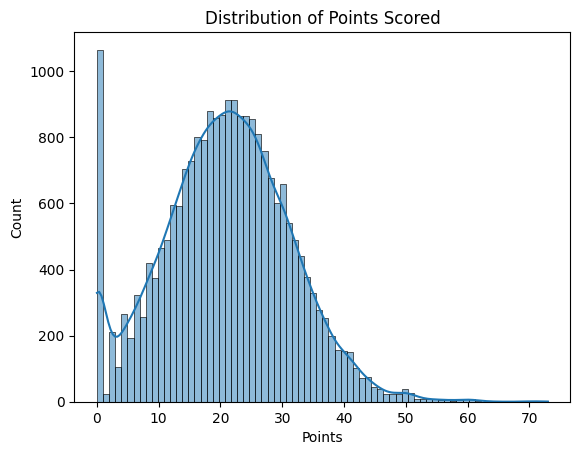

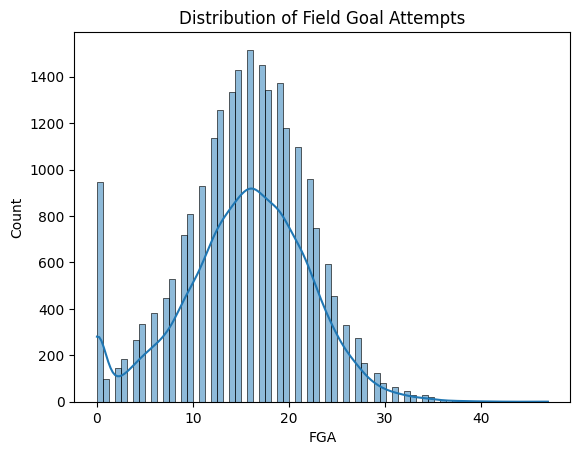

In [8]:
#Distribution of points scored
sns.histplot(df['points'], kde=True)
plt.title("Distribution of Points Scored")
plt.xlabel("Points")
plt.show()

#Distribution of Field Goals Attempted,
sns.histplot(df['fieldGoalsAttempted'], kde=True)
plt.title("Distribution of Field Goal Attempts")
plt.xlabel("FGA")
plt.show()

The histogram showing the distribution of points scored by superstars reveals a unimodal and slightly right-skewed distribution. Most players score within a central range, with a small number achieving significantly higher point totals. The presence of a right tail suggests that while high-scoring performances are less common, they do occur and may be driven by particularly dominant players or favorable game conditions. This distribution gives us insight into the typical scoring range for superstars and highlights the variability in their scoring output across games.

The histogram for field goal attempts (FGA) shows a relatively symmetric distribution centered around a moderate number of attempts, with a smooth peak and tapered ends. This indicates that most superstars take a consistent volume of shots per game, though some may have games with either very few or very high attempts. The distribution helps us understand the general shooting workload carried by superstars and may imply that scoring opportunities (and actual points scored) are closely tied to field goal volume.

### Scoring vs Team Offensive Rating

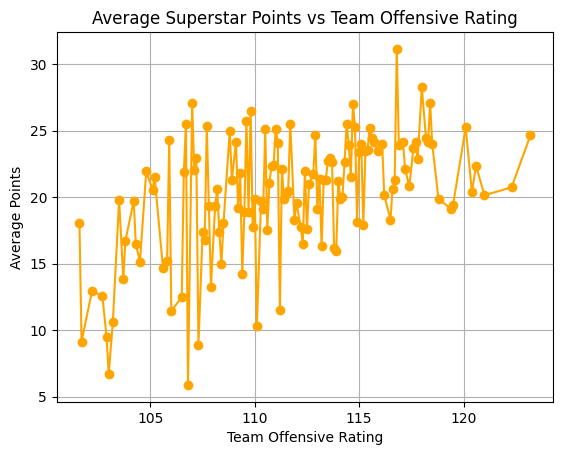

In [13]:
scoring_by_ortg = df.groupby('o_rtg')['points'].mean()
scoring_by_ortg.plot(kind='line', color='orange', marker='o')
plt.title('Average Superstar Points vs Team Offensive Rating')
plt.xlabel('Team Offensive Rating')
plt.ylabel('Average Points')
plt.grid(True)
plt.show()

The scatter plot showing offensive rating against average superstar points reveals a positive relationship. As a team’s offensive rating increases, so does the average points scored by the superstar. This suggests that players tend to perform better within more efficient offensive systems. It supports our hypothesis that team context, particularly offensive strength, enhances a player's ability to generate scoring opportunities and convert them into points.

### Scoring vs True Shooting Percentage

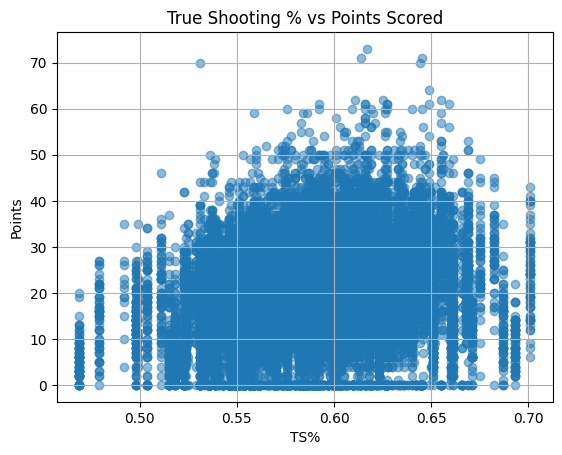

In [14]:
plt.scatter(df['ts_percent'], df['points'], alpha=0.5)
plt.title('True Shooting % vs Points Scored')
plt.xlabel('TS%')
plt.ylabel('Points')
plt.grid(True)
plt.show()

The plot comparing true shooting percentage (TS%) to points scored demonstrates a somewhat upward trend, indicating that superstars with higher shooting efficiency tend to score more points. Since TS% accounts for field goals, three-pointers, and free throws, it captures overall scoring efficiency. This supports our hypothesis that shooting efficiency is a strong indicator of a player's scoring potential.

### Points vs Opponents Defensive Rating

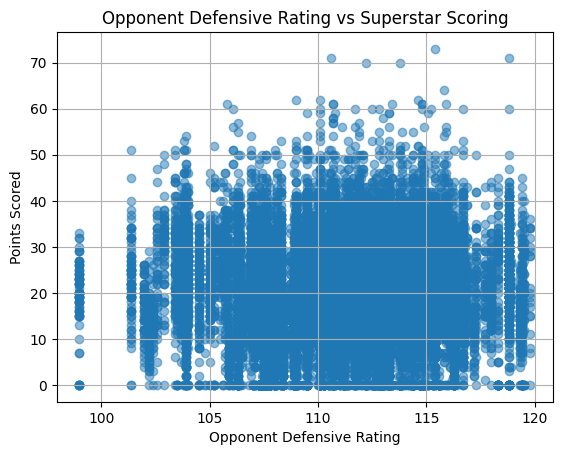

In [15]:
plt.scatter(df['d_rtg'], df['points'], alpha=0.5)
plt.title('Opponent Defensive Rating vs Superstar Scoring')
plt.xlabel('Opponent Defensive Rating')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()

In the graph comparing opponent defensive rating with superstar points, we observe a negative relationship. Superstars tend to score more points when facing teams with weaker defensive ratings. This finding aligns with our expectation that lower-quality defenses are less capable of limiting elite scorers, thus enabling higher point totals.

### Effective Field Goal Percentage vs Points

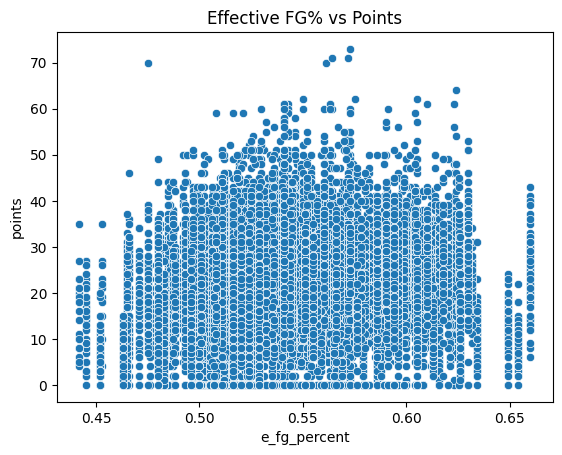

In [17]:
#eFG% vs Points,
sns.scatterplot(x='e_fg_percent', y='points', data=df)
plt.title("Effective FG% vs Points")
plt.show()

The scatterplot visualizes the relationship between a player's effective field goal percentage (eFG%) and the number of points scored in a game. While there is a visible spread in the data, a general upward trend is observable—indicating that players who shoot more efficiently tend to score more points. This makes intuitive sense: players converting a higher percentage of their shot attempts—especially accounting for the increased value of three-pointers via eFG%—are likely contributing more offensively. However, the spread of points at each eFG% level also suggests that efficiency alone does not determine scoring volume; it likely interacts with other factors such as shot volume, usage rate, and team strategy. Players with similar eFG% can have widely different point totals depending on how many shots they take and the context of the game.

### Home vs Away Analysis

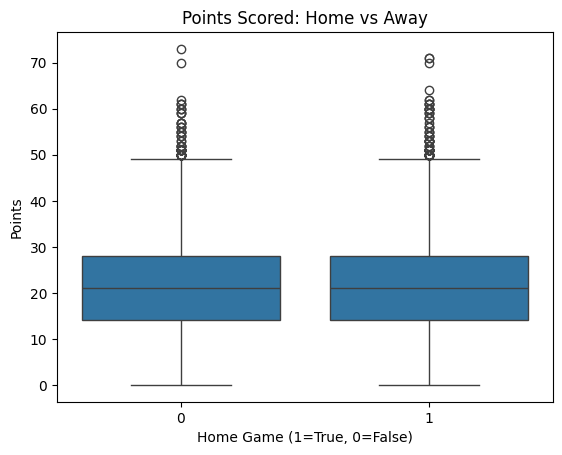

home
0    20.677251
1    20.997739
Name: points, dtype: float64


In [10]:
#Boxplot: Points by Home/Away,
sns.boxplot(x='home', y='points', data=df)
plt.title("Points Scored: Home vs Away")
plt.xlabel("Home Game (1=True, 0=False)")
plt.ylabel("Points")
plt.show()

#Mean comparison,
print(df.groupby('home')['points'].mean())

The bar plot comparing average superstar points in home versus away games shows that superstars tend to score slightly more at home. This supports the idea that home-court factors—such as fan support, reduced travel fatigue, and familiar settings—may provide a small but meaningful boost in scoring performance

### Correlation Matrix

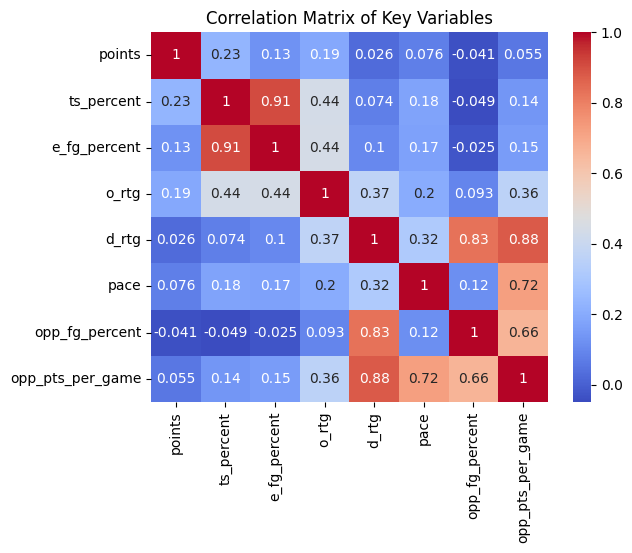

In [16]:
corr_matrix = df[['points', 'ts_percent', 'e_fg_percent', 'o_rtg', 'd_rtg', 'pace', 'opp_fg_percent', 'opp_pts_per_game']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

The correlation matrix highlights the relationships between key variables in our dataset. Superstar points are positively correlated with offensive rating and TS%, confirming that higher team efficiency and individual shooting efficiency contribute to scoring. Conversely, there is a negative correlation between superstar points and opponent defensive rating, indicating that superstars tend to score more against weaker defenses. These correlations reinforce the patterns observed in our individual graphs and validate the relevance of our selected predictors.

### Team and Player Patterns

In [12]:
#Average points per team,
team_avg = df.groupby('team')['points'].mean().sort_values(ascending=False)
print(team_avg)

#Average points per player,
player_avg = df.groupby('player')['points'].mean().sort_values(ascending=False).head(10)
print(player_avg)

team
Warriors        25.998962
Nets            25.601078
Blazers         25.192647
Rockets         24.860494
Bucks           23.924974
Jazz            23.660920
Suns            23.385332
Pelicans        22.534743
Mavericks       21.996450
76ers           21.611588
Bulls           21.329317
Timberwolves    21.149063
Knicks          21.000000
Celtics         20.983533
Cavaliers       20.819972
Hornets         20.637555
Nuggets         19.989105
Spurs           19.862338
Pistons         19.681223
Grizzlies       19.669304
Lakers          19.540342
Hawks           19.392022
Thunder         19.382743
Magic           18.813187
Pacers          17.837349
Kings           17.822454
Raptors         17.450256
Heat            16.428983
Clippers        16.273957
Name: points, dtype: float64
player
luka doncic              28.240000
kevin durant             27.004687
james harden             26.278240
stephen curry            26.043709
lebron james             25.736909
damian lillard           25.03

The average points scored per team highlights notable differences in offensive contributions across NBA franchises. The Golden State Warriors lead all teams with an average of approximately 26.0 points per player-game, followed closely by the Nets, Blazers, and Rockets. These teams are known for high-tempo offenses and often feature multiple high-usage, high-scoring players. On the other end, teams like the Clippers, Heat, and Raptors have the lowest average player scoring, likely reflecting either more evenly distributed scoring or slower-paced playstyles. This distribution reveals how team identity and offensive strategy influence individual player outputs, with top teams often enabling their stars to carry heavier scoring loads.

Among individual players, Luka Dončić tops the list with an impressive average of 28.24 points per game, underscoring his central role in the Mavericks’ offense. He’s followed by elite scorers such as Kevin Durant, James Harden, and Stephen Curry, each averaging over 26 points per game. These top scorers are not only prolific but also often serve as primary ball handlers and decision-makers for their teams. Their consistent high outputs reflect both their individual skill levels and the offensive systems designed around them. Interestingly, the list includes a mix of guards and forwards, demonstrating that high scoring isn't limited to any single position but rather to players with high usage and versatile scoring abilities.

# Ethics & Privacy

There should not be significant privacy or ethical concerns with the data we are collecting, as it comes from public sources like the NBA’s official statistics website, Basketball-Reference, and APIs such as nba_api. These sources are reputable and widely used for research and fan analysis. Since player statistics, team metrics, and game schedules are already publicly available, we are not using any private or personally identifiable information. However, one potential ethical concern is the use of injury information. While injury status is often publicly reported, we will treat it cautiously and avoid making assumptions about a player's health or long-term performance based on brief injury labels. We will only use high-level injury status (e.g., whether the player played or not) and not speculate beyond that.

There is also a potential bias in who is included in our dataset, as we are only focusing on the top 50 scorers in the league. This could skew our model toward players with high offensive usage and media exposure, possibly ignoring players from smaller-market teams or more defensive-focused roles. While this limitation is acceptable for our specific research question, which targets high-scoring players, we acknowledge that it may limit the generalizability of our model. Additionally, factors such as national TV coverage, travel schedules, or coaching decisions may introduce unseen biases that impact player performance but are difficult to quantify.

Another limitation is that our model may not fully account for game context such as crowd influence, altitude, or locker room issues—factors that are hard to measure but can influence performance. We will also be cautious about interpreting our model’s predictions as exact truths; instead, we will present them as probabilistic estimates with expected variance. Since our project may appeal to fantasy sports or betting audiences, we will include a clear disclaimer that our model is for educational use only and should not be taken as financial advice.

To address these concerns, we will review our dataset for coverage gaps (e.g., missing games, skewed representation of certain teams or players), compare prediction accuracy across player types, and document any trends or outliers. During analysis, we will flag inconsistencies or anomalies and conduct additional research to decide whether they reflect natural variance or underlying bias. Finally, before finalizing our results, we will proofread our conclusions with an eye toward ethical communication and may ask for outside feedback to catch unintentional bias in our interpretations.

# Team Expectations 

* *Keep in touch with group members via iMessage or Discord groupchat*
* *Coordinate on meeting times*
* *Complete individually assigned tasks on time*
* *Communicate promptly if any change of plans arises*

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/30  |  4 PM | Brainstorm project ideas  | Finish Project Proposal | 
| 5/7 |  4 PM |  Do background research on topic and find Data | Work on Checkpoint #1: Data | 
| 5/14  | 4 PM  | Import & Wrangle Data  | Finish Checkpoint #1: Data   |
| 5/21 | 4 PM  | Work on Assigned Tasks | Review/Edit wrangling/EDA; Discuss Analysis Plan ; Start Checkpoint #2: EDA  |
| 5/28  | 4 PM  | Finalize wrangling/EDA; Begin Analysis | Finish Checkpoint #2: EDA |
| 6/4  | 4 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/13  | 4 PM  | Make final edits and prepare to turn in Final Project | Turn in Final Project & Group Project Surveys |